In [92]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library('tibble')
library('data.table')
library('RColorBrewer')

In [93]:
anno_col = list(
    response_short = c(PRO = "rosybrown1", R = "lightgreen", '0' = 'gray95', PD = 'tomato'), 
    treatment_group = c(ICI_PD1 = 'paleturquoise1', ICI_combo = 'turquoise', '0' = 'gray95'),
     sex = c(M = 'lightblue2', F = 'mistyrose'), 
     state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
#      subtype = c(cutaneous = 'honeydew2', uveal = 'lightgoldenrodyellow', 
#                  mucosal = 'mistyrose2', 'unknown primary' = 'gray95'),
#      tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
#                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
#                 bone = 'seagreen3', '0' = 'gray95'),
    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    day = colorRampPalette(brewer.pal(4, "RdPu")) (40),
    pfs = colorRampPalette(brewer.pal(4, "Greys")) (40),
     ncells = colorRampPalette(brewer.pal(4, "Greens")) (40)  
               )

In [94]:
cDC  <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")
CD4T <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD4T011422.rds")
CD8T <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCTmerge_CD8Tcleaned020922.rds")

# summarize cell counts

In [95]:
cDC_counts <- cDC@meta.data[c('uid', 'Ident' )] %>% table() %>% data.frame() %>%
        spread( key = Ident, value = Freq)

CD4T_counts <- CD4T@meta.data[c('uid', 'Ident' )] %>% table() %>% data.frame() %>%
        spread( key = Ident, value = Freq)

CD8T_counts <- CD8T@meta.data[c('uid', 'Ident' )] %>% table() %>% data.frame() %>%
        spread( key = Ident, value = Freq) 

In [96]:
CD8T_counts$Tex <-  CD8T_counts$'c0(Texme)' +CD8T_counts$'c2(CD69+ Tex)'+CD8T_counts$'c4(HNRNPH1+ Tex)'+CD8T_counts$'c8(HSPD1+ Tex)'
CD8T_counts$Tem <-  CD8T_counts$'c1(Tem)' +CD8T_counts$'c5(GZMK+ Teff)'+CD8T_counts$'c9(GNLY+ Teff)'
CD8T_counts$Tn <-  CD8T_counts$'c3(Tn)'
CD8T_counts$all <-  CD8T_counts$'Tn'+CD8T_counts$'Tem'+CD8T_counts$'Tex'

names(CD8T_counts) <- paste0('CD8T.', names(CD8T_counts))

In [97]:
CD4T_counts$non_Treg <- CD4T_counts$'c0(Tn)'+CD4T_counts$'c2(CD69+ T)'+CD4T_counts$'c3(Tm)'+CD4T_counts$'c4(Tex)'

names(CD4T_counts) <- paste0('CD4T.', names(CD4T_counts))

In [98]:
celltype_counts <- left_join(cDC_counts, CD8T_counts,  by = c('uid' = 'CD8T.uid')) %>%
        left_join(CD4T_counts,  by = c('uid' = 'CD4T.uid'))

In [99]:
celltype_counts <- celltype_counts %>% replace(., is.na(.), 0)

## add in annotation

In [100]:
annot <- cDC@meta.data[c('uid','treatment_group','prior_therapy',
                             'state','response','day','pfs')] %>% 
    unique 

In [101]:
celltype_counts <- left_join(celltype_counts, annot, by = 'uid')


In [102]:
names(celltype_counts)

[1] "uid"                    "cDC2"                   "cDC1"                  
 [4] "cDC3"                   "CD8T.c0(Texme)"         "CD8T.c1(Tem)"          
 [7] "CD8T.c2(CD69+ Tex)"     "CD8T.c3(Tn)"            "CD8T.c4(HNRNPH1+ Tex) "
[10] "CD8T.c5(GZMK+ Teff)"    "CD8T.c6(NKT)"           "CD8T.c7(FTL+ Teff)"    
[13] "CD8T.c8(HSPD1+ Tex)"    "CD8T.c9(GNLY+ Teff)"    "CD8T.Tex"              
[16] "CD8T.Tem"               "CD8T.Tn"                "CD8T.all"              
[19] "CD4T.c0(Tn)"            "CD4T.c1(Treg)"          "CD4T.c2(CD69+ T)"      
[22] "CD4T.c3(Tm)"            "CD4T.c4(Tex)"           "CD4T.c5(NKT)"          
[25] "CD4T.non_Treg"          "treatment_group"        "prior_therapy"         
[28] "state"                  "response"               "day"                   
[31] "pfs"

# correlations with T cell abundance

## cDC3 and CD4T

Warning message:
“Use of `celltype_counts$"CD4T.c1(Treg)"` is discouraged. Use `CD4T.c1(Treg)` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `celltype_counts$"CD4T.c1(Treg)"` is discouraged. Use `CD4T.c1(Treg)` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$"CD4T.c0(Tn)"` is discouraged. Use `CD4T.c0(Tn)` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. U

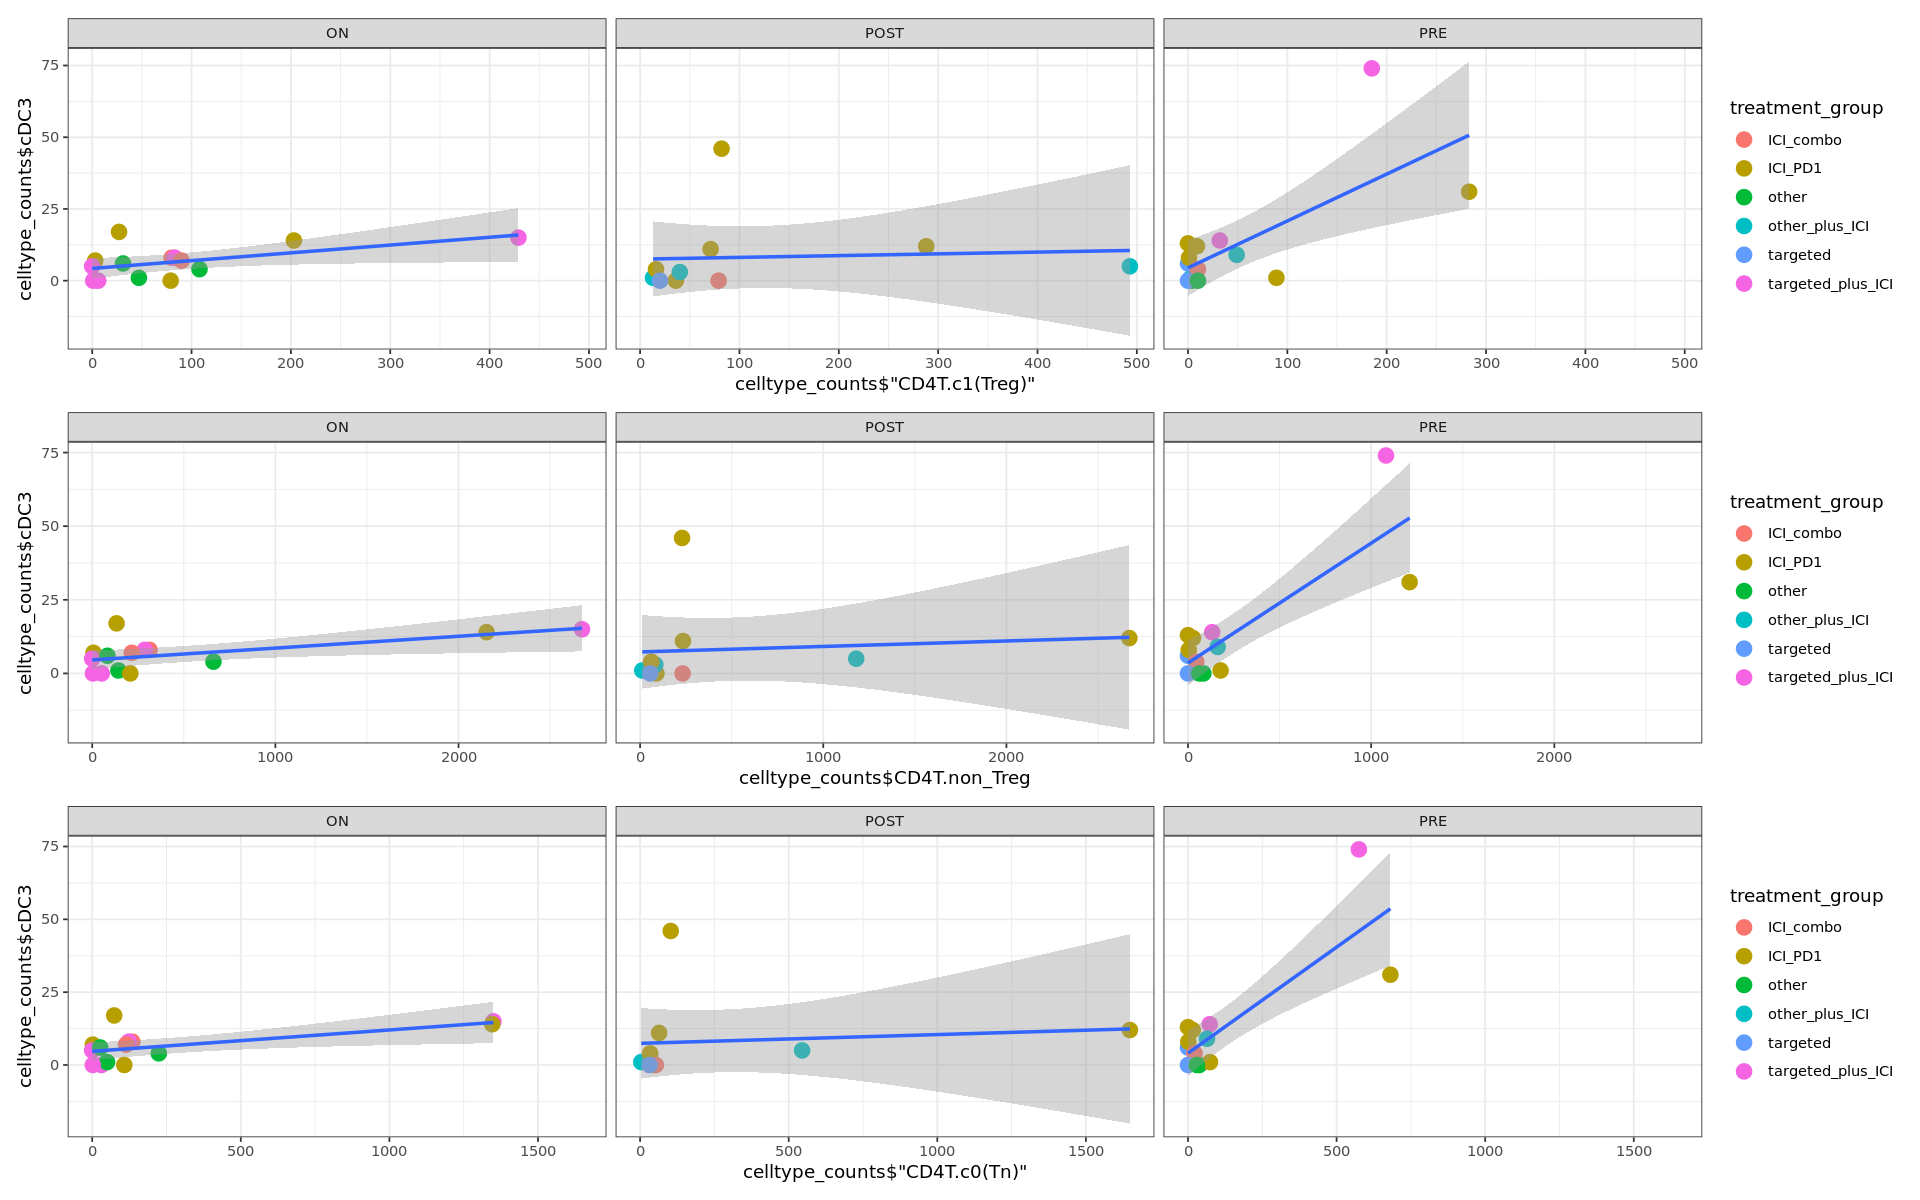

In [103]:
p1 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD4T.c1(Treg)')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p2<-  celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD4T.non_Treg')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p3 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD4T.c0(Tn)')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()

options(repr.plot.width=16, repr.plot.height=10)
p1/p2/p3

## cDC3 and CD8T

Warning message:
“Use of `celltype_counts$CD8T.Tn` is discouraged. Use `CD8T.Tn` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `celltype_counts$CD8T.Tn` is discouraged. Use `CD8T.Tn` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD8T.Tem` is discouraged. Use `CD8T.Tem` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `celltype_counts$CD8T.Tem` is discouraged. Use `CD8T.Tem` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD8T.Tex` is discouraged. Use `CD8T.Tex` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `celltype_c

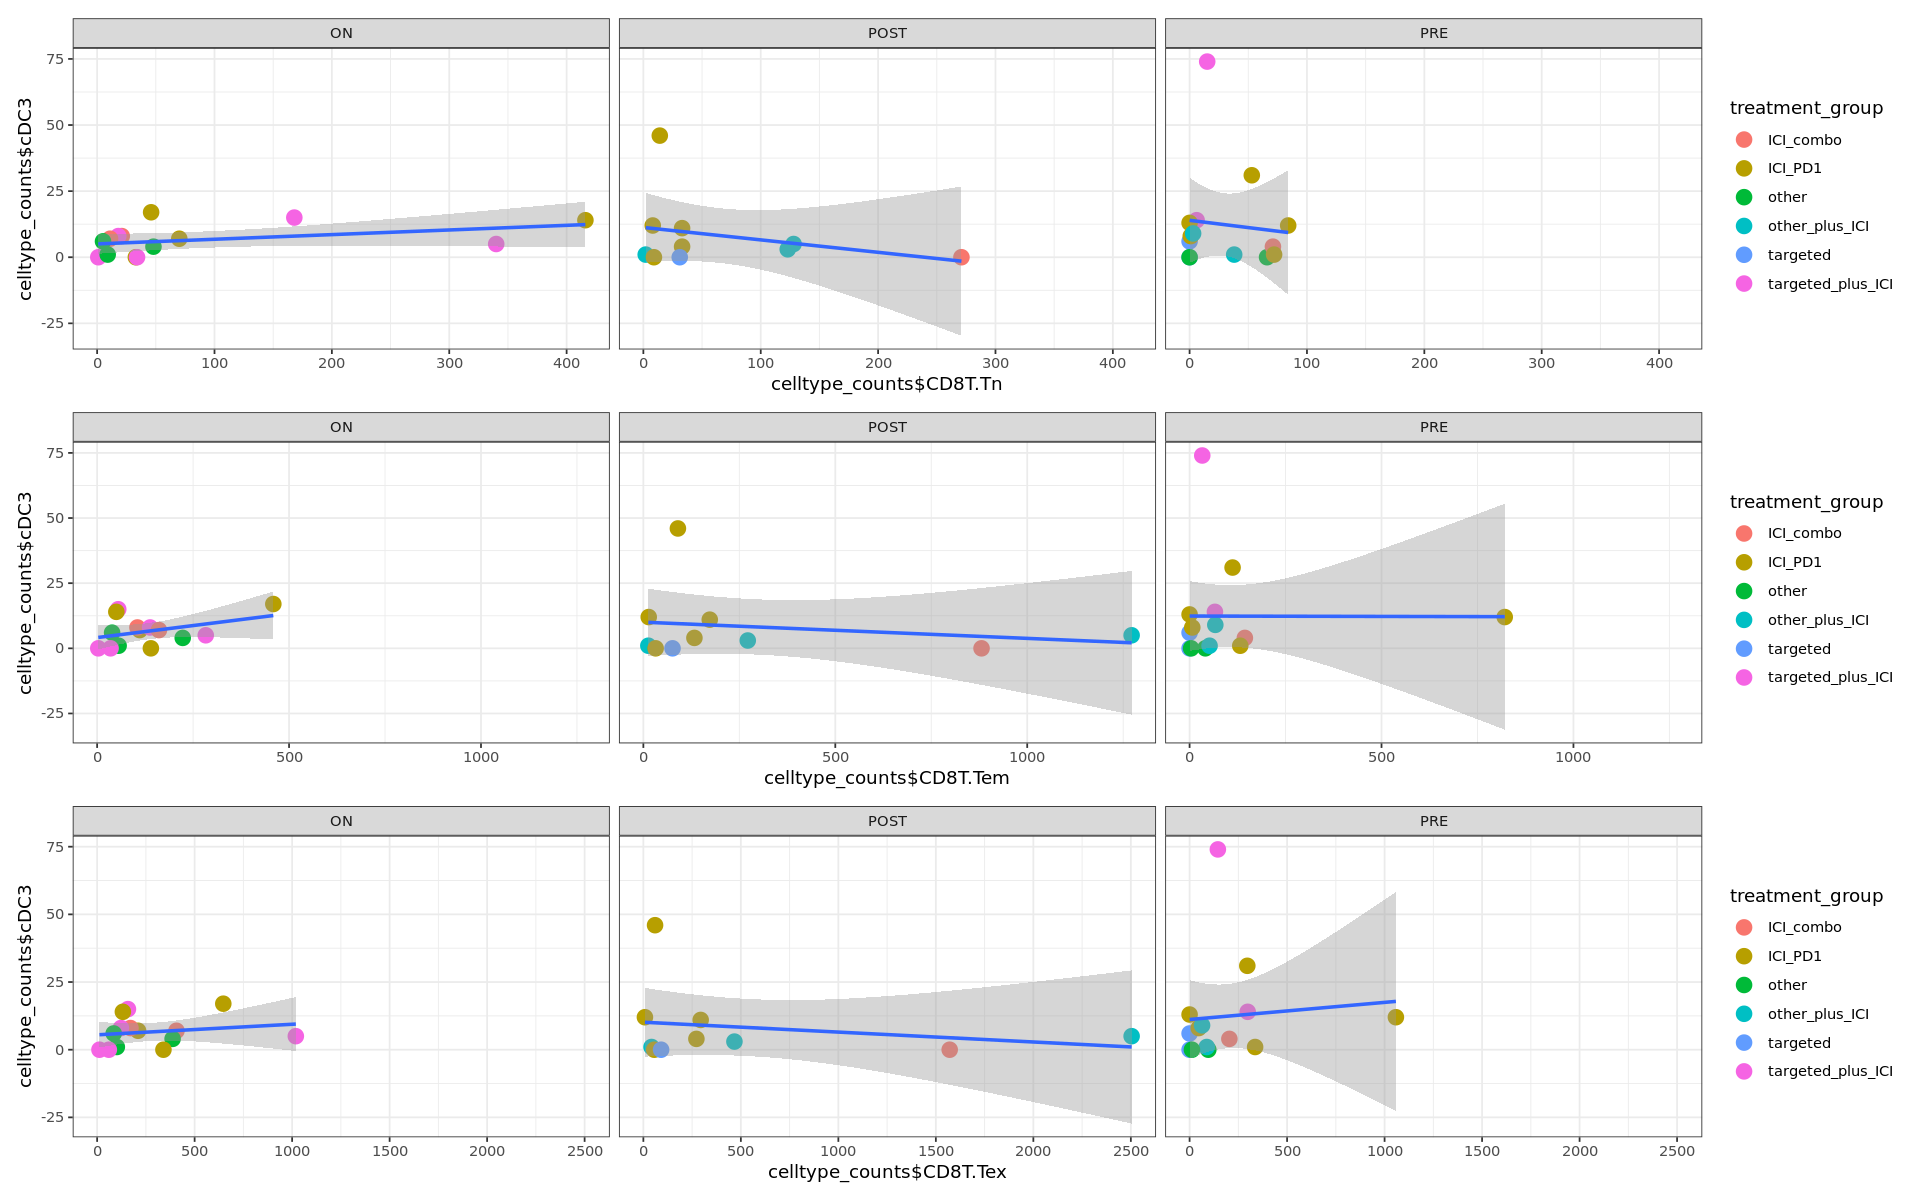

In [104]:
p1 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD8T.Tn')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p2 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD8T.Tem')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p3 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD8T.Tex')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()

options(repr.plot.width=16, repr.plot.height=10)
p1/p2/p3

## cDC1/2 and T

Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC1` is discouraged. Use `cDC1` instead.”
Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC1` is discouraged. Use `cDC1` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC2` is discouraged. Use `cDC2` instead.”
Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC2` is discouraged. Use `cDC2` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD4T.non_Treg` is discouraged. Use `CD4T.non_Treg` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use

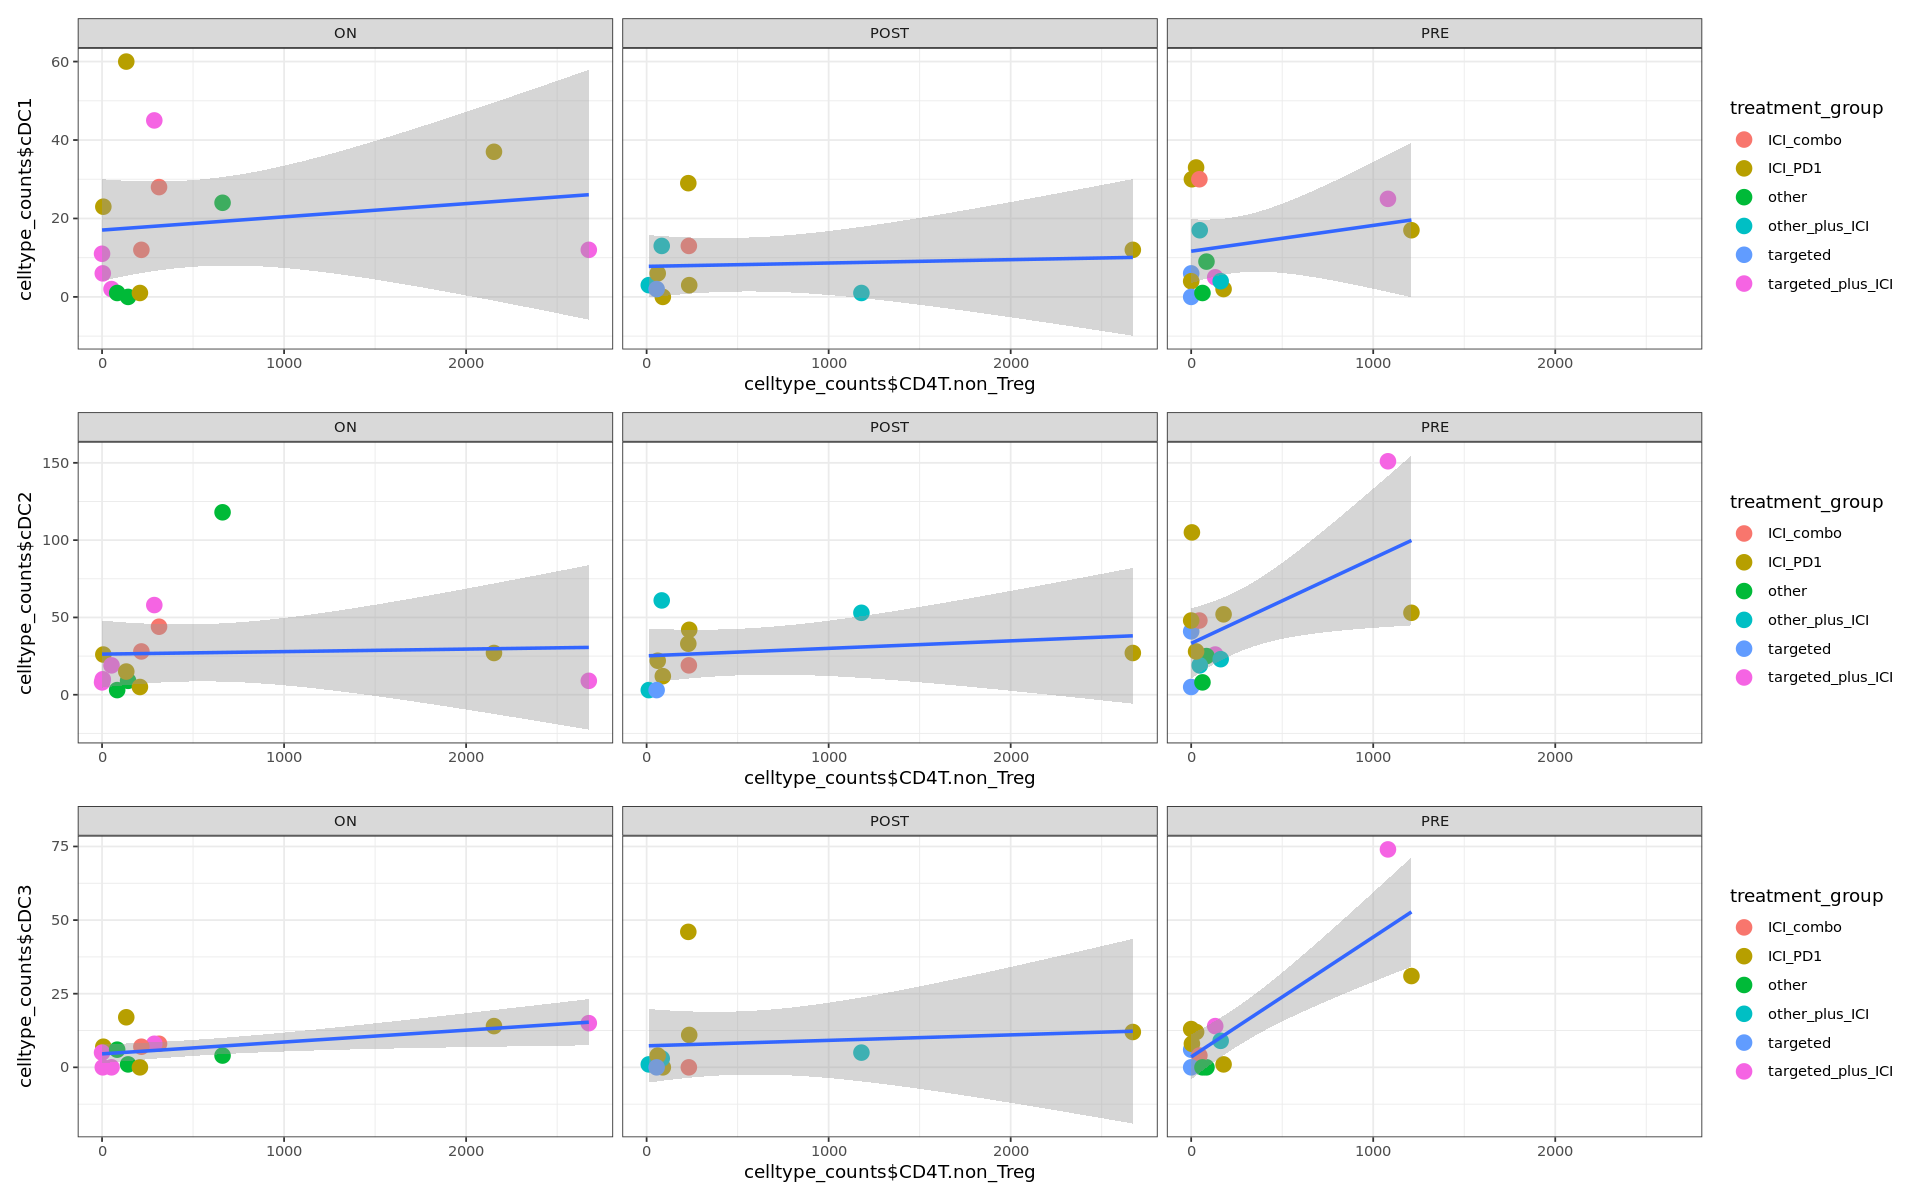

In [105]:
p1 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC1', x=celltype_counts$'CD4T.non_Treg')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p2<-  celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC2', x=celltype_counts$'CD4T.non_Treg')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p3 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD4T.non_Treg')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()

options(repr.plot.width=16, repr.plot.height=10)
p1/p2/p3

Warning message:
“Use of `celltype_counts$CD8T.all` is discouraged. Use `CD8T.all` instead.”
Warning message:
“Use of `celltype_counts$cDC1` is discouraged. Use `cDC1` instead.”
Warning message:
“Use of `celltype_counts$CD8T.all` is discouraged. Use `CD8T.all` instead.”
Warning message:
“Use of `celltype_counts$cDC1` is discouraged. Use `cDC1` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD8T.all` is discouraged. Use `CD8T.all` instead.”
Warning message:
“Use of `celltype_counts$cDC2` is discouraged. Use `cDC2` instead.”
Warning message:
“Use of `celltype_counts$CD8T.all` is discouraged. Use `CD8T.all` instead.”
Warning message:
“Use of `celltype_counts$cDC2` is discouraged. Use `cDC2` instead.”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Use of `celltype_counts$CD8T.all` is discouraged. Use `CD8T.all` instead.”
Warning message:
“Use of `celltype_counts$cDC3` is discouraged. Use `cDC3` instead.”
Warning message:
“Use of `cellty

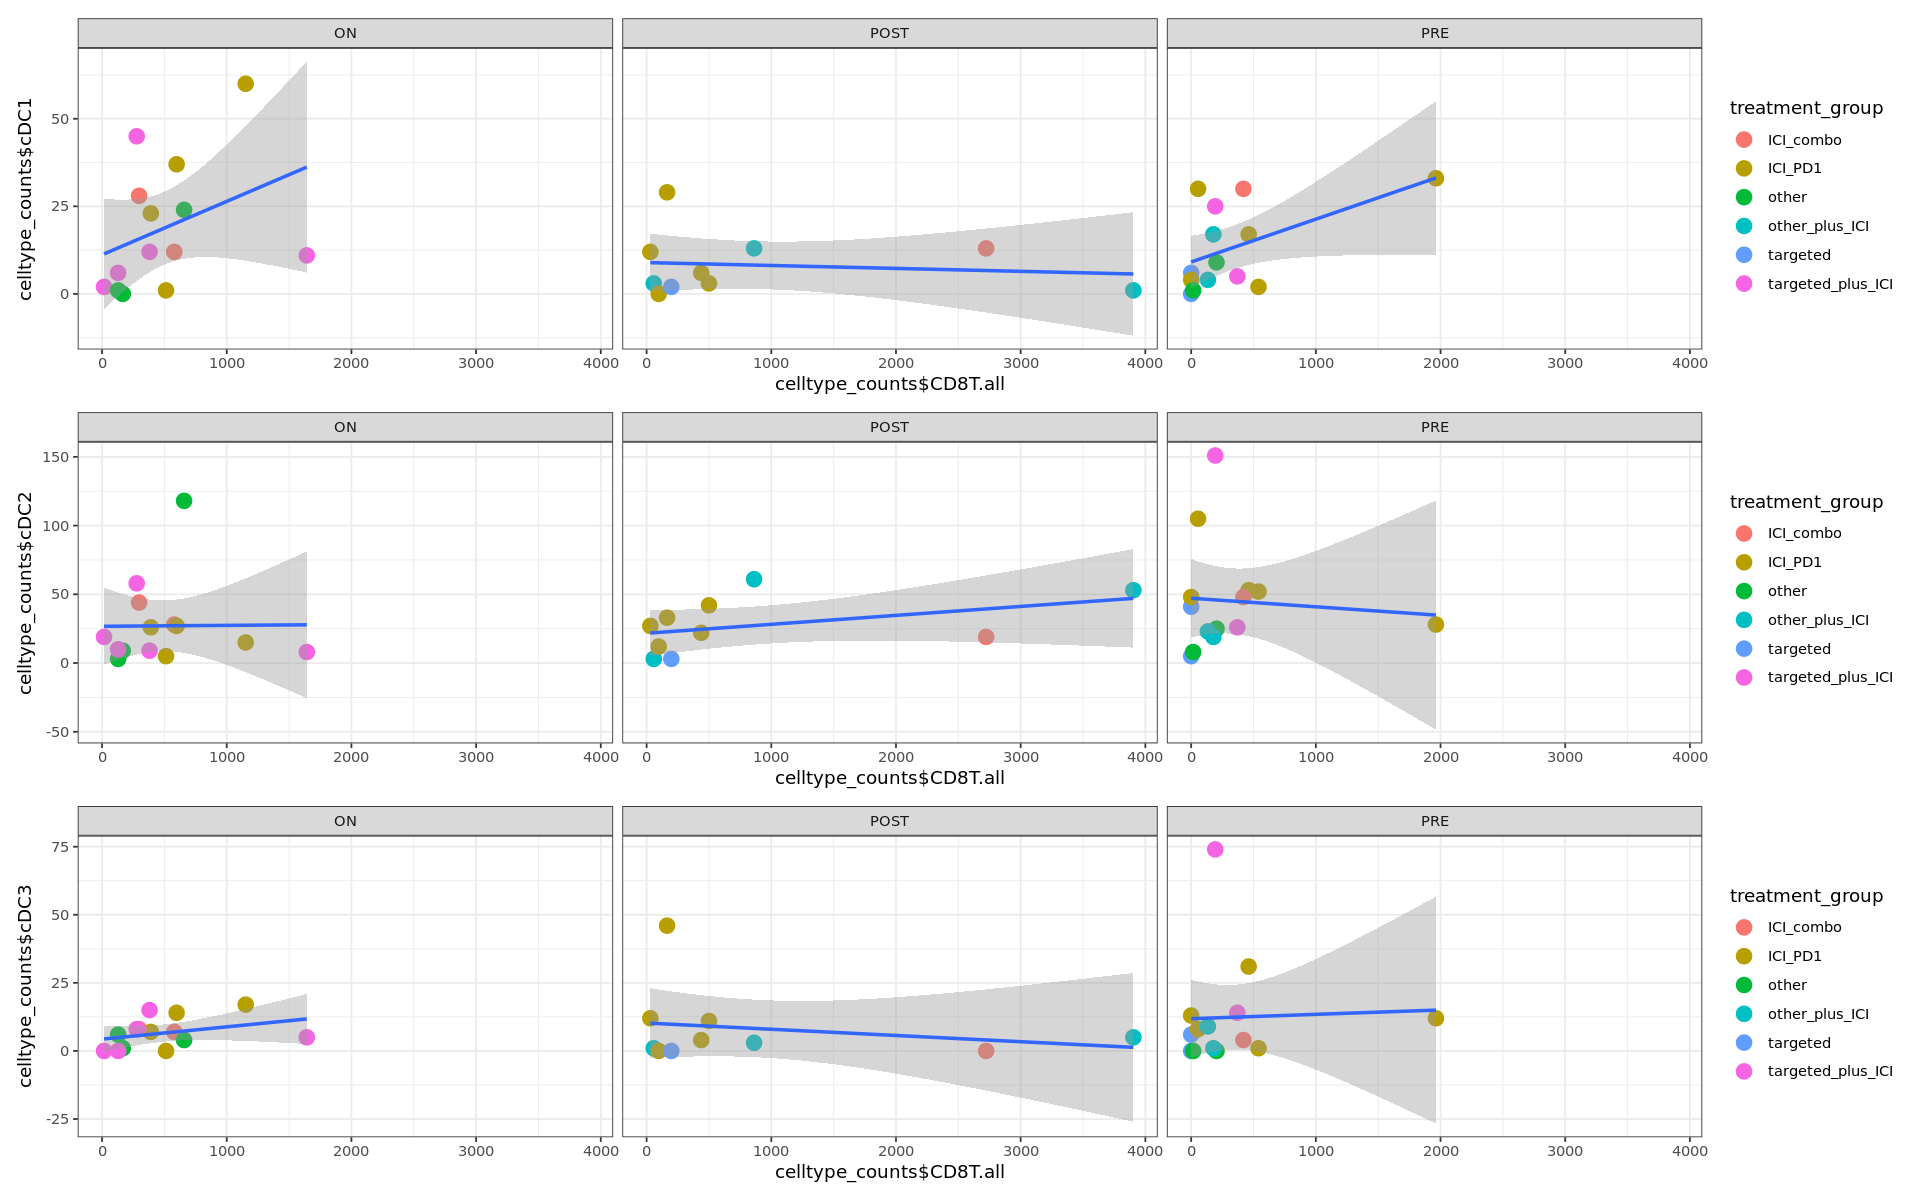

In [106]:
p1 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC1', x=celltype_counts$'CD8T.all')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p2 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC2', x=celltype_counts$'CD8T.all')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()
p3 <- celltype_counts%>% 
    ggplot( aes( y=celltype_counts$'cDC3', x=celltype_counts$'CD8T.all')) + 
    geom_point(aes(colour = treatment_group),size = 4) +     
    facet_grid(~state)+
      geom_smooth(method=lm) +
    theme_bw()

options(repr.plot.width=16, repr.plot.height=10)
p1/p2/p3

In [108]:
write.csv(cDC_counts,
          file = '/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/contextualizedLearning/cDC_count_050922.csv' , 
          row.names = FALSE)